In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

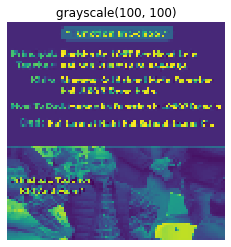

In [46]:
img_ = cv2.imread("meme.jpg")
img_ = cv2.cvtColor(img_,cv2.COLOR_BGR2RGB)
img_ = cv2.resize(img_,(100,100))
img_gray = cv2.cvtColor(img_,cv2.COLOR_RGB2GRAY)
drawImg(img_gray,"grayscale")
img_gray = img_gray / 255

In [47]:
def drawImg(img,title = "Image"):
    plt.imshow(img)
    plt.title(title + str(img.shape))
    plt.axis("off")
    plt.show()

In [48]:
#Hardcoded Filter

def convolution(img,img_filter):
    W = img.shape[0]
    H = img.shape[1]
    
    F = img_filter.shape[0] #3
    
    new_img = np.zeros((W-F+1,H-F+1))
    
    for row in range(W-F+1):
        for col in range(H-F+1):
            for i in range(F):
                for j in range(F):
#                     print(i,j)
#                     print(row,col)
                    
                    new_img[row][col] += img[row+i][col+j]*img_filter[i][j]
                    
                    if new_img[row][col] > 255:
                        new_img = 255
                        
                    if new_img[row][col] < 0:
                        new_img = 0
                        
    
    return new_img
    

In [49]:
blur_filter = np.ones((3,3))/9.0

print(blur_filter.shape)

output_1 = convolution(img_gray,blur_filter)

(3, 3)


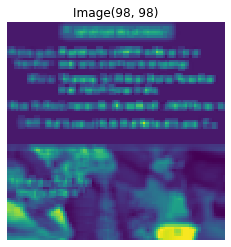

In [50]:
drawImg(output_1)

In [52]:
# edge_filter = np.array([[1,0,-1],
#                         [1,0,-1],
#                         [1,0,-1]]
#                       )


# output_2 = convolution(img_gray,edge_filter)
# drawImg(output_2)
#not working with this image


(100, 100, 3)


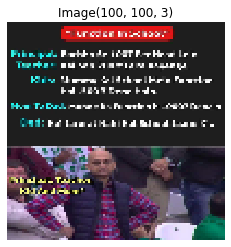

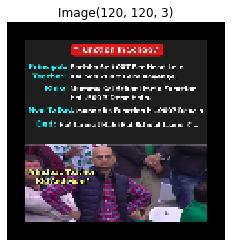

In [59]:
print(img_.shape)
drawImg(img_)

#Pad

pad_img = np.pad(img_,((10,10),(10,10),(0,0)),'constant',constant_values = 0)
drawImg(pad_img)

## Implement Pooling Operation

In [60]:
X = np.array([[1,0,2,3],[4,6,6,8],[3,1,1,0],[1,2,2,4]])

In [63]:
def pooling(X, mode = 'max'):
     
    stride = 2
    f = 2
    
    H,W = X.shape
    
    HO = int((H-f)/stride) + 1
    WO = int((H-f)/stride) + 1
    
    output = np.zeros((HO,WO))
    
    for r in range(HO):
        for c in range(WO):
            r_start = r*stride
            r_end = r*stride + f
            c_start = c*stride
            c_end = c*stride + f
            
            X_slice = X[r_start:r_end,c_start:c_end]
            if mode == "max":
                output[r][c] = np.max(X_slice)
            else:
                output[r][c] = np.mean(X_slice)
                
    
    return output
            

In [64]:
pooling(X)


array([[6., 8.],
       [3., 4.]])